<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Intro" data-toc-modified-id="Intro-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Intro</a></span></li><li><span><a href="#Data" data-toc-modified-id="Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data</a></span></li><li><span><a href="#DNN" data-toc-modified-id="DNN-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DNN</a></span></li><li><span><a href="#Quantile-regressor" data-toc-modified-id="Quantile-regressor-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Quantile regressor</a></span></li><li><span><a href="#Boostrap" data-toc-modified-id="Boostrap-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Boostrap</a></span></li><li><span><a href="#Compare-Linear-data" data-toc-modified-id="Compare-Linear-data-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Compare Linear data</a></span></li><li><span><a href="#Compare:-Heteroscedasticity-data" data-toc-modified-id="Compare:-Heteroscedasticity-data-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Compare: Heteroscedasticity data</a></span></li></ul></div>

# Prediction interval 

**TODO:**

1. Linear Data
    * Compute prediction intevals in linear data and compare with +/- sigma
    * Use the data to introduce the algorithms: DNN, Qunatile and Booststrap
    * Compare qith quantile regression, bootstrap and the true model  +/- sigma
    
2. Non Linear data  (heterosdaticity)
    * Compare results with quantile regression and boostrap 
    
* Move quantile regression to a new notebook. It is too big to be here

## Intro

In many situations only a punctual estimation is not enough for take decisions. For instance if a car dealler wants to shchedule a preemptive mantenance, a ML model that outputs that a car will present a fault in 60 days is not enough. A ML that outputs that a car will present a fault between 65 - 90 days with 99% of probability is a way better information in this situation.

In this notebook we present 3 different ways of estimate predictions intervals in machine learnings. 
1. DNN: ([High-Quality Prediction Intervals for Deep Learning: A Distribution-Free, Ensembled Approach](https://arxiv.org/abs/1802.07167))
    * Crons:
        * Requires a lot of data to have good estimation

1. Quantile regression [Quantile regression ](https://www.jstor.org/stable/1913643) and [Dan Saattrup Nielsen](https://saattrupdan.github.io/2020-03-09-quantile-regression/)
    * Crons:
        * Requires a lot of data to have good estimation

1. Boostrap for computing prediciton intervals [Dan Saattrup Nielsen](https://saattrupdan.github.io/2020-03-01-bootstrap-prediction/)
    * Crons: Computational expensive. Not practical for large models or big data
    * Pros: 
        * Simple, and easy to understand and explain
        * Good for small data size or linear regression models 

**TODO**: Add advantage and disadvantage of each approache HERE

We adopt a pragmatic approach in how to use the models and highlight the main concepts of each methodology. The details on how it works and the models implementations is outside of the scope of this notebook. Please rely on the references and academic article from that. 

The first concept we want to dicuss, is the concept of prediction intervals and confidence intervals. The total uncertainty in machine learning is given by:

$
\sigma_y^2 = \sigma_{model}^2 + \sigma_{noise}^2
$

where $\sigma_{model}^2$ can be decomposed in the bias and variance error.

$\sigma_{noise}^2$ is the **irreductivel error**

Below is the main differences:

* Confidence Intervals in inference (https://en.wikipedia.org/wiki/Prediction_interval)
    * quantify the uncertainty in a population parameter such as the mean
    * Take into account data dispersion in a sample of a population
    * Confience intervals in the context of regression is an estimation of $\sigma_{model}^2$ 
    
* ML Confidence Intervals ([High-Quality Prediction Intervals for Deep Learning: A Distribution-Free, Ensembled Approach](https://arxiv.org/abs/1802.07167)):
    * Uncertainty in models  ($\sigma_{model}^2$)
    * Usually measure uncertainty in determination of the statistics of a population like the mean.

> PS: code (python) and discusison to help with plot ci and pi together:
> * https://towardsdatascience.com/how-confidence-and-prediction-intervals-work-4592019576d8
> * https://towardsdatascience.com/confidence-intervals-vs-prediction-intervals-7b296ae58745

* ML Prediciton Intervals
    * quantify uncertainty of model and noise $\sigma_{model}^2 + \sigma_{noise}^2$
    * Prediction intervals describe the uncertainty for a single specific outcome not observable before (**prediction**)
    * Prediction intervals usually is not constant accross $X$ and certainly $PI > CI$

This notebook is split in 2 sections 1. Linear data. A short section where we compare the applicaiton of the 3 approaches in linear data and; 2. Heteroscedasticity data where we compare the first 2 approaches in a more complex data, since Boostrap  cannot be handle [Heteroscedasticity](https://en.wikipedia.org/wiki/Homoscedasticity_and_heteroscedasticity) ([Dan Saattrup Nielsen](https://saattrupdan.github.io/2020-03-09-quantile-regression/))

References:
* https://en.wikipedia.org/wiki/Prediction_interval
* https://en.wikipedia.org/wiki/Confidence_and_prediction_bands
* https://machinelearningmastery.com/prediction-intervals-for-machine-learning/
* Blog of the dats scientist: [Dan Saattrup Nielsen](https://saattrupdan.github.io/)  **<== This one is very good**
    * https://saattrupdan.github.io/2020-03-01-bootstrap-prediction/
    * https://saattrupdan.github.io/2020-03-09-quantile-regression/

In [1]:
import IPython
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
# import keras
# from keras import backend as K

print(tf.__version__)

2.2.0


In [2]:
from utils import qd_objective, mpiw_pct, mpiw, picp,mpiw_pct_metric, mpiw_metric,picp_metric

ModuleNotFoundError: No module named 'utils'

In [16]:
!pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458.3 MB 32 kB/s              
     |████████████████████████████████| 4.6 MB 10.2 MB/s            
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached termcolor-1.1.0-py3-none-any.whl
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     |████████████████████████████████| 462 kB 10.9 MB/s            
     |████████████████████████████████| 5.6 MB 7.7 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 4.0 MB 8.2 MB/s            
  Using cached protobuf-3.19.4-cp36-cp36m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (1.1 MB)
  Preparing metadata (setup.py) ... done
  Using cached Keras_Preprocessing-1.1.2-py2.py3-none-any.whl (42 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
     |████████████████████████████████| 132 kB 10.2 MB/s            
     |███████████████████████████

## Data

* Linear data for simplicity and comapre with linera reression
* Non linear qith hetredosticity data to compare all approaches

2 std: 0.50


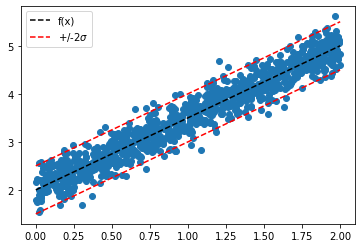

In [2]:
# create some data
n_samples = 1000

X = np.random.uniform(low=0.,high=2.,size=(n_samples,1))

_sigma = 0.25
noise = np.random.normal(loc=0.,scale=_sigma,size=(n_samples,1))

a = 1.5
b = 2.0

f_x = a*X + b  
y =  f_x + noise

#y = y.reshape([-1,1])/5.  # Is this important? Divide by 5 ? Why did he do it?
y = y.reshape([-1,1])  # Is this important? Divide by 5 ? Why did he do it?

noise.shape
X_train = X.reshape(-1)
y_train = y.reshape(-1)

X_train.shape
y_train.shape

yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted
x_grid = np.linspace(0.0,2,100) # for evaluation plots

plt.scatter(X_train,y_train)

f_x = a*x_grid + b  

_delta = 2.0*_sigma  # 2 sigmas

print(f"2 std: {_delta:.2f}")

plt.plot(x_grid, f_x, 'k--',label='f(x)'); # regression line
plt.plot(x_grid, f_x + _delta, 'r--', label='+/-2$\sigma$'); # upper boundary prediction
plt.plot(x_grid, f_x - _delta, 'r--'); # lower boundary prediction
plt.legend();

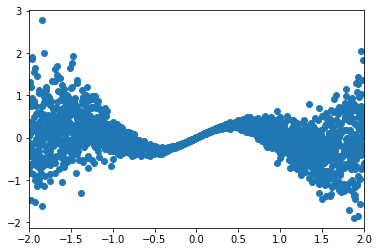

In [3]:
# create some data
n_samples = 2500
X = np.random.uniform(low=-2.,high=2.,size=(n_samples,1))
y = 1.5*np.sin(np.pi*X[:,0]) + np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))

# normalization
y = y.reshape([-1,1])/5.

X_train = X.reshape(-1)
y_train = y.reshape(-1)

yy_train = np.stack((y_train,y_train),axis=1) # make this 2d so will be accepted
x_grid = np.linspace(-2,2,100) # for evaluation plots

y_train.shape
yy_train.shape

# TODO: Add f(x) +/- 2 sigma
#   f(x) = 1.5*np.sin(np.pi*X[:,0])
#   sigma => see scale in the code np.random.normal(loc=0.,scale=1.*np.power(X[:,0],2))
plt.scatter(X_train,y_train);
plt.xlim(-2,2);
plt.show();

## DNN

refs:

* https://github.com/TeaPearce/Deep_Learning_Prediction_Intervals
* High-Quality Prediction Intervals for Deep Learning: A Distribution-Free, Ensembled Approach
    * https://arxiv.org/pdf/1802.07167.pdf

A High Quality (HQ) is defined as:
1. Should narrow as posisible capture the data uncertainty. The  should rely on the narrow interval
1. It has highest as possible interval coverage

The author purpose a new loss functions with 2 terms to address the problem of find a high quality interval. The first term is relared to the interval size (MPIW_c) and the second with interval coverage. Both tersm in the los are minimized: MPIW_c and coverage related term:
* $Loss_{QD} = MPIW_c + f(PICP_S)$

The interval coverage (PICP) is maximized by minimizing the second term. 

Loss definition

* Approximation $B(n, (1- \alpha)) \approx N(n(1-\alpha), n\alpha(1 - \alpha))$ requires batch size greather than 50
    * requies batch size greather than 50

* We want minimize MPIW with the contraint: $PICP < (1 - \alpha) \equiv (PCIP - (1 -\alpha)) > 0$
* $Loss = MPIW_{cap} + \lambda \frac{n}{\alpha (1 - \alpha)}max(0, (1-\alpha) - PCIP)^2$
    * extra penality when the $\lambda \frac{n}{\alpha (1 - \alpha)}max(0, (1-\alpha) - PCIP)^2$ is not in the interval
    * extra penality when the  is not in the interval: 


In [4]:
# hyperparameters
lambda_ = 0.01 # lambda in loss fn
alpha_ = 0.30  # capturing (1-alpha)% of samples
soften_ = 160.
n_ = n_samples # batch size

n_

# define loss fn
def qd_objective(y_true, y_pred, n_=100, lambda_=0.01, alpha_ = 0.05, soften_ = 160):
    '''Loss_QD-soft, from algorithm 1'''

    y_true = y_true[:,0]
    y_u = y_pred[:,0]
    y_l = y_pred[:,1]

    K_HU = tf.maximum(0.,tf.sign(y_u - y_true))
    K_HL = tf.maximum(0.,tf.sign(y_true - y_l))
    K_H = tf.multiply(K_HU, K_HL)

    K_SU = tf.sigmoid(soften_ * (y_u - y_true))
    K_SL = tf.sigmoid(soften_ * (y_true - y_l))
    K_S = tf.multiply(K_SU, K_SL)

    MPIW_c = tf.reduce_sum(tf.multiply((y_u - y_l),K_H))/tf.reduce_sum(K_H)
    PICP_H = tf.reduce_mean(K_H)
    PICP_S = tf.reduce_mean(K_S)

    Loss_S = MPIW_c + lambda_ * n_ / (alpha_*(1-alpha_)) * tf.maximum(0.,(1-alpha_) - PICP_S)

    return Loss_S

def picp_metric(y_true, y_pred, soften_=160):

    y_true = y_true[:,0]
    
    y_u = y_pred[:,0]
    y_l = y_pred[:,1]

    K_SU = tf.sigmoid(soften_ * (y_u - y_true))
    K_SL = tf.sigmoid(soften_ * (y_true - y_l))
    K_S = tf.multiply(K_SU, K_SL)

    PICP_S = tf.reduce_mean(K_S)
    
    return PICP_S


def mpiw_metric(y_true, y_pred):
    
    y_true = y_true[:,0]
    
    y_u = y_pred[:,0]
    y_l = y_pred[:,1]

    K_HU = tf.maximum(0.,tf.sign(y_u - y_true))
    K_HL = tf.maximum(0.,tf.sign(y_true - y_l))
    K_H = tf.multiply(K_HU, K_HL)

    MPIW_c = tf.reduce_sum(tf.multiply((y_u - y_l),K_H))/tf.reduce_sum(K_H)

    return MPIW_c


def loss_qd(y_true, y_pred):

    return qd_objective(y_true, y_pred,n_, lambda_, alpha_, soften_)


def picp_metric_(y_true, y_pred):
    
    return picp_metric(y_true, y_pred, soften_=soften_)

def coverage_term_metric(y_true, y_pred):
    
    y_true = y_true[:,0]

    y_u = y_pred[:,0]
    y_l = y_pred[:,1]

    K_SU = tf.sigmoid(soften_ * (y_u - y_true))
    K_SL = tf.sigmoid(soften_ * (y_true - y_l))
    K_S = tf.multiply(K_SU, K_SL)
    
    PICP_S = tf.reduce_mean(K_S)

    coverage_term = lambda_ * n_ / (alpha_*(1-alpha_)) * tf.maximum(0.,(1-alpha_) - PICP_S)
    
    return coverage_term

2500

In [6]:
# set up model
model = Sequential()
model.add(Dense(100, input_dim=1, activation='relu',
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.2)))
model.add(Dense(2, activation='linear',
                kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.3), 
                bias_initializer=tf.keras.initializers.Constant(value=[2.0,1.0]))) # important to init biases to start!

# compile
opt = tf.keras.optimizers.Adam(learning_rate=0.02, decay=0.005)
model.compile(loss=qd_objective, optimizer=opt, metrics=[mpiw_metric,coverage_term_metric,picp_metric_])

In [16]:
%%time
result = model.fit(X_train, yy_train, epochs=5, batch_size=n_, verbose=1,  validation_split=0.)

Epoch 1/5
1/1 [==============================] - 1s 522ms/step - loss: 20.4210 - mpiw_metric: 1.1267 - coverage_term_metric: 15.8686 - picp_metric_: 0.0335
Epoch 2/5
1/1 [==============================] - 0s 3ms/step - loss: 19.3235 - mpiw_metric: 1.2218 - coverage_term_metric: 14.5198 - picp_metric_: 0.0902
Epoch 3/5
1/1 [==============================] - 0s 2ms/step - loss: 16.7175 - mpiw_metric: 1.5239 - coverage_term_metric: 11.2309 - picp_metric_: 0.2283
Epoch 4/5
1/1 [==============================] - 0s 3ms/step - loss: 11.2790 - mpiw_metric: 2.0425 - coverage_term_metric: 4.4936 - picp_metric_: 0.5113
Epoch 5/5
1/1 [==============================] - 0s 5ms/step - loss: 2.7500 - mpiw_metric: 2.7500 - coverage_term_metric: 0.0000e+00 - picp_metric_: 0.9582
CPU times: user 547 ms, sys: 46.9 ms, total: 594 ms
Wall time: 577 ms


In [32]:
def graph_pi_report(result):
    
    result_loss =np.array(result.history['loss']).reshape(-1)

    result_loss.shape

    print(f"loss last 5 values: {result_loss[-6:-1]}")
    print(f"mean loss last 5 values: {np.mean(result_loss[-6:-1])}")

    val_loss = result.history.get('val_loss')
    
    x = range(result_loss.shape[0])
    plt.plot(x, result_loss, label='train')
    
    if val_loss:
        plt.plot(x, val_loss, label='val')
    
    plt.title('Loss')
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    #plt.ylim(0,6)
    plt.show()
 
    # view training
    result_mpiw = np.array(result.history['mpiw_metric']).reshape(-1)
    result_coverage_term = np.array(result.history['coverage_term_metric']).reshape(-1)

    print(f"Init guess => mpiw: {result_mpiw[0]}; coverage_term: {result_coverage_term[0]}")
    print(f"Last values => mpiw: {result_mpiw[-1]}; coverage_term: {result_coverage_term[-1]}")

    fig, ax1 = plt.subplots()
    x = range(result_mpiw.shape[0])

    ax2 = ax1.twinx()
    ax1.plot(x, result_mpiw, label='mpiw_metric', color='b')
    ax2.plot(x, result_coverage_term,label='coverage_term_metric',color='g')

    # ax1.set_xlabel('X data')
    ax1.set_ylabel('mpiw_metric', color='b')
    ax2.set_ylabel('coverage_term_metric', color='g')

    #plt.legend()
    plt.show()

    # view training
    result_mpiw = np.array(result.history['mpiw_metric']).reshape(-1)
    result_picp = np.array(result.history['picp_metric_']).reshape(-1)

    print(f"Init guess => mpiw: {result_mpiw[0]}; picp: {result_picp[0]}")
    print(f"Last values => mpiw: {result_mpiw[-1]}; picp: {result_picp[-1]}")

    fig, ax1 = plt.subplots()

    x = range(result_mpiw.shape[0])

    ax2 = ax1.twinx()
    ax1.plot(x, result_mpiw, label='mpiw_metric', color='b')
    ax2.plot(x, result_picp,label='picp_metric_',color='g')

    # ax1.set_xlabel('X data')
    ax1.set_ylabel('mpiw_metric', color='b')
    ax2.set_ylabel('picp_metric_', color='g')

    plt.show()
    
    val_picp = result.history.get('val_picp_metric_')
    train_picp = result.history['picp_metric_']
    
    if val_picp:
        
        plt.plot(x, train_picp, label='train')
        plt.plot(x, val_picp, label='val')
        plt.title('picp')
        
        plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
        
        plt.show()

loss last 5 values: [20.42104149 19.32352257 16.71748734 11.27900314]
mean loss last 5 values: 16.935263633728027


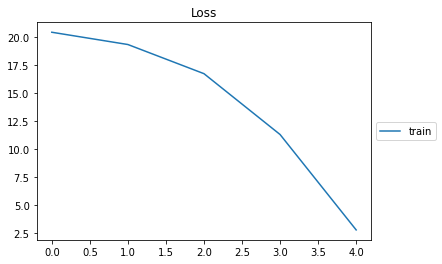

Init guess => mpiw: 1.1266885995864868; coverage_term: 15.868614196777344
Last values => mpiw: 2.7500405311584473; coverage_term: 0.0


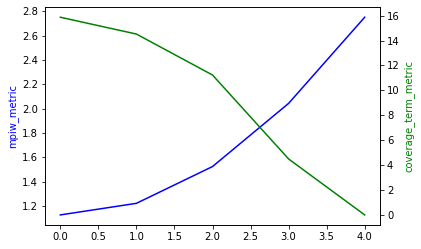

Init guess => mpiw: 1.1266885995864868; picp: 0.03351818025112152
Last values => mpiw: 2.7500405311584473; picp: 0.9582106471061707


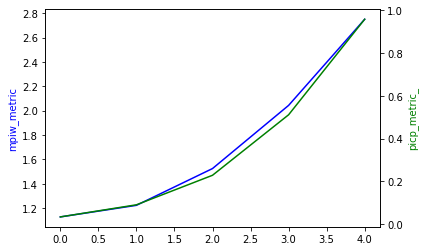

In [33]:
graph_pi_report(result)

## Quantile regressor 

**TODO**:

1. Break this nb: Create a new intro_quantile_regression.ipynb 
1. Cite intro_quantile_regression.ipynb here 
1. small description

Disanbiquation:

Linear Quantile Regressor (Statistics)
* alternative to linear regression when there is Heteroscedasticity. Can be seen as generalization of Lnear regression
assumptions (https://stats.stackexchange.com/questions/320991/what-are-the-assumptions-for-applying-a-quantile-regression-model)
* no assumtions about the target distributions (**The main motivation**)
* linearity of the coeficients (LighGBM does not have this assumtions)
* independence of observations
* very large sample size, as quantile regression is not very efficient
* y is "very" continuos


LightGBM quantile regressor (Machine Learning)

* Quantile is used to predict intervals of target variable
* The main difference related to generic regression is the loss function:
pinball loss: pos slope is  and negative slope is  (https://www.lokad.com/pinball-loss-function-definition#:~:text=The%20pinball%20loss%20function%20is,forecast%20is%20a%20subtle%20problem.)
 * $\tau = 0.5$ the loss is symetric
 * $\tau < 0.5$ penalizes more the positive error (see inclimation of the loss)
 * $\tau > 0.5$ penalizes more the negative side
* based on R doc: https://astrostatistics.psu.edu/datasets/R/html/quantreg/html/rq.html
    * $\tau$ is the quantile to be predict, so in python is 
* LIGHGBM $\alpha$ is the quantile we want to predict

In [7]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

X_train = X_train.reshape(-1, 1)

# combine the vectors into a single two-dimensional array
# x_train = np.column_stack((X_train, X_train))

# x_train.shape
y_train.shape

sample_size = n_samples

params = {
    'objective': 'quantile',
    'metric': 'quantile',
    'max_depth': 2,
    'num_leaves': 10,
    'learning_rate': 0.1,
    'n_estimators': 150,
    'boosting_type': 'gbdt'
}

y_preds = np.zeros((sample_size, 3))
quantiles = [.05, .5, .95]

x_grid2 = np.linspace(-2,2,sample_size).reshape(-1, 1)

y_preds.shape
x_grid2.shape

for i in range(len(quantiles)):
    print('prediction of quantile', quantiles[i])
    lgb = LGBMRegressor(alpha=quantiles[i], **params)
    model = lgb.fit(X_train, y_train)
    y_preds[:, i] = model.predict(x_grid2)

(2500,)

(2500, 3)

(2500, 1)

prediction of quantile 0.05
prediction of quantile 0.5
prediction of quantile 0.95


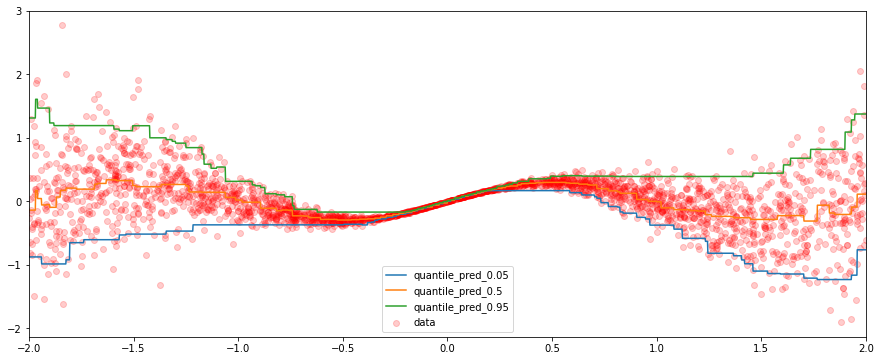

In [9]:
plt.figure(figsize=[15, 6])

plt.scatter(X_train, y_train, label='data', alpha=.2, color='red')
for i in range(len(quantiles)):
    plt.plot(x_grid2, y_preds[:, i], label='quantile_pred_{}'.format(quantiles[i]))
    
plt.xlim(-2,2)
plt.legend();

## Boostrap 

Bootstrapping is a resampling technique that involves generating new datasets by sampling with replacement from the original dataset. It can be used to estimate prediction intervals by repeatedly fitting the model to bootstrap samples and computing the desired quantiles of the resulting distribution of predictions.

* Pros (statisics)
    * No assuption of data distribution. Linear regression assumes normal distributions and **Homoscedasticity** fr instance. So, can be more reliable. 

* Crons:
    * computationally expensive
    * the PI can be too narrow or too wide many times
    * the bootstrap resampling method may produce biased prediction intervals because it assumes that the errors are homoscedastic
        *  In such cases, it may be necessary to use a modified bootstrap method that takes into account the heteroscedasticity of the errors. (More complex. Not in this nb) 
refs:
* https://medium.com/@joetrankang/i-used-data-science-and-bootstrap-to-determine-the-optimal-housing-price-daddeefaa8eb
* Look gitlab code and org files for R code for boostrap 


In [34]:
params = {
    'objective': 'mse',
    'metric': 'mse',
    'max_depth': 2,
    'num_leaves': 10,
    'learning_rate': 0.1,
    'n_estimators': 150,
    'boosting_type': 'gbdt'
}

def boot_prediction(X_train,y_train, new_x, repetitions):
    predictions = []
    for i in range(repetitions):
        
        idxs = np.random.choice(len(X_train), size=500, replace=True)
        X_boot = X_train[idxs]
        y_boot = y_train[idxs]
        
        lgb = LGBMRegressor( **params)
        model = lgb.fit(X_boot, y_boot)
                
        y_preds = model.predict(new_x)
        # TODO: Review dimensions here 
        predictions.append(y_preds)
        
        #print(f"len(preds): {len(predictions)}; y_preds shape: {y_preds.shape}")
        
    predictions = np.array(predictions)
    
    print(f"preds shape: {predictions.shape}")
    # Find the ends of the approximate 95% prediction interval
    _lower = np.percentile(predictions, 5.0,axis=0)
    _median = np.percentile(predictions, 50.0,axis=0)
    _upper = np.percentile(predictions, 95.0,axis=0)
    
    return _lower, _median, _upper

_lower,_median, _upper = boot_prediction(X_train,y_train, x_grid2, repetitions=500)

preds shape: (500, 2500)


In [35]:
_lower.shape
_median.shape
_upper.shape

(2500,)

(2500,)

(2500,)

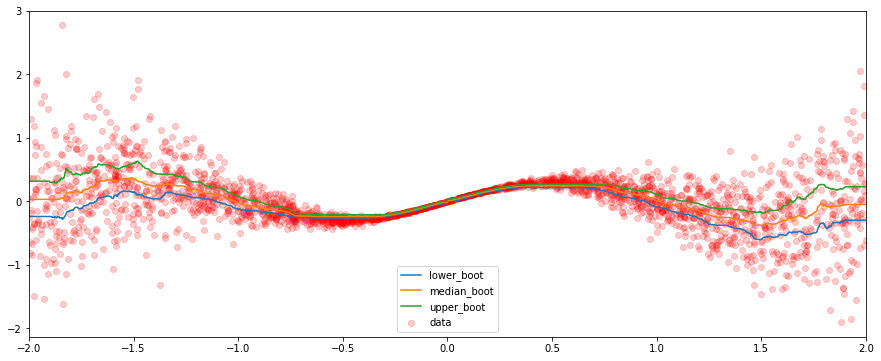

In [36]:
plt.figure(figsize=[15, 6])

plt.scatter(X_train, y_train, label='data', alpha=.2, color='red')
plt.plot(x_grid2,_lower , label='lower_boot')
plt.plot(x_grid2, _median, label='median_boot')
plt.plot(x_grid2, _upper, label='upper_boot')

plt.xlim(-2,2)
plt.legend();

**Note**:
    
* I believe boostarp does not work well because the sample size per x level change a lot and also the std. Make hard to boostrap capture the uncertainty in regions with high Heteroscedasticity
    

## Compare Linear data

## Compare: Heteroscedasticity data